In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver2D as s2

## Mesh creation

In [2]:
mesh = BoxMesh(Point(-1, -1, 0), Point(1, 1, 1), 20, 20, 20)
# mesh = UnitCubeMesh(10, 10, 10)
V = FunctionSpace(mesh,"P",1)

## Test Case


In [14]:
m0 = 1e-3
dt = 0.5
T = 250
save_interval = 10
times = [] #[0,7/dt,14/dt,21/dt,28/dt]
doses = [] #10*np.ones_like(times)  
V = FunctionSpace(mesh,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigma_x = sqrt(0.008),degree=2)
# n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,sigma=sqrt(0.02),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/V1e5_sigma01_T250"

solver = s2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()


time=0: 
Solving linear variational problem.
iter=1: norm=0.910654
Solving linear variational problem.
iter=2: norm=6.94154e-05
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=2.01402e-05
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=2.31543e-05
Solving linear variational problem.
time=1.5: 
Solving linear variational problem.
iter=1: norm=2.65153e-05
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=3.02469e-05
Solving linear variational problem.
time=2.5: 
Solving linear variational problem.
iter=1: norm=3.43801e-05
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=3.89461e-05
Solving linear variational problem.
time=3.5: 
Solving linear variational problem.
iter=1: norm=4.3976e-05
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=4.95005e-05
Solving linear va

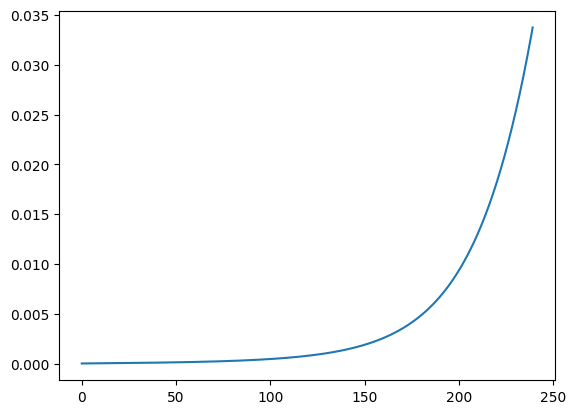

In [10]:
path_sol = "solutions/V1e5_ref20_sigma01_T120"
mass = np.load(path_sol + '/mass.npy')
plt.plot(mass)
# path_sol2 = "solutions/prova_T100"
# mass2 = np.load(path_sol2 + '/mass.npy')
# plt.plot(mass2)

# plt.xlim([0,40])

In [11]:
# oxygen level test case 1
c = Function(V)
cfile = XDMFFile(path_sol + '/c.xdmf')
ctot = []
for i in range(200):
    cfile.read_checkpoint(c,"c",i)
    print(c.vector().max())
    ctot.append(assemble(c*dx))
plt.plot(ctot)

0.29490554137474745
0.2949061349753713
0.29490587493803205
0.2949051150523498
0.29490402232892204
0.2949026836836114
0.29490114770050047
0.29489944275608004
0.2948975857482558
0.2948955866353555
0.29489345094167607
0.29489118120805424
0.29488877786476725
0.2948862397737714
0.2948835645743638
0.2948807489079595
0.2948777885661422
0.29487467858840505
0.2948714133257884
0.2948679864805646
0.29486439112844803
0.2948606197275429
0.29485666411679723
0.29485251550586344
0.2948481644575792
0.2948436008639756
0.2948388139163322
0.29483379206967364
0.2948285230019212
0.29482299356777447
0.2948171897473781
0.2948110965896395
0.2948046981501105
0.2947979774232289
0.2947909162686502
0.29478349533141385
0.29477569395556424
0.2947674900908567
0.2947588601921184
0.29474977911077216
0.2947402199779923
0.29473015407894154
0.29471955071742995
0.29470837707033914
0.2946965980310759
0.2946841760412425
0.2946710709097047
0.29465723961810625
0.2946426361118526
0.2946272110755163
0.2946109116914982
0.29459368

RuntimeError: 

*** -------------------------------------------------------------------------
*** DOLFIN encountered an error. If you are not able to resolve this issue
*** using the information listed below, you can ask for help at
***
***     fenics-support@googlegroups.com
***
*** Remember to include the error message listed below and, if possible,
*** include a *minimal* running example to reproduce the error.
***
*** -------------------------------------------------------------------------
*** Error:   Unable to reading data from XDMF file.
*** Reason:  Storage format "" is unknown.
*** Where:   This error was encountered inside XDMFFile.cpp.
*** Process: 0
*** 
*** DOLFIN version: 2019.1.0
*** Git changeset:  3ea2183fbfe7277de9f16cbe1a9ffaab133ba1fa
*** -------------------------------------------------------------------------


0.018837456521793496 0.797921313589447 0.18330476454467157


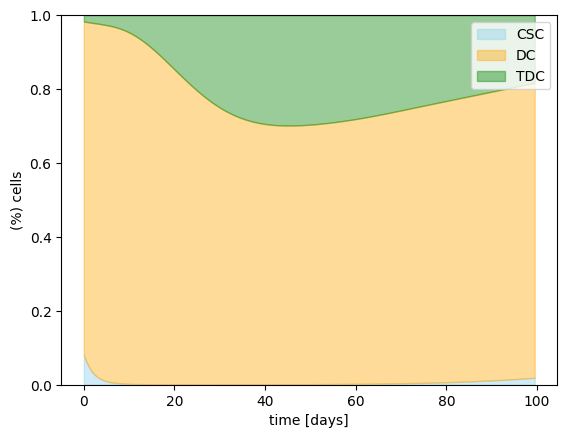

In [9]:
csc = np.load(path_sol + '/csc_mass.npy')
dc = np.load(path_sol + '/dc_mass.npy')
tdc = np.load(path_sol + '/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
time=np.arange(0,100,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])
print(csc[-1],dc[-1],tdc[-1])

## Comparison

In [17]:
path_sol1 = "../Model3D/solutions/t400_masses"
mesh2 = IntervalMesh(20,0,1)
V2 = FunctionSpace(mesh2,"P",1)
c = Function(V2)
cfile = XDMFFile(path_sol1 + '/c.xdmf')
c1 = []
for i in range(50,200,2):
    cfile.read_checkpoint(c,"c",i)
    c1. append(c.vector().min())
    # ctot.append(assemble(c*dx))

In [18]:
path_sol2 = "../Model1D/solutions/B_Km0.005"
mesh2 = UnitSquareMesh(20,20)
V2 = FunctionSpace(mesh2,"P",2)
c = Function(V2)
cfile = XDMFFile(path_sol2 + '/c.xdmf')
c2 = []
for i in range(25,100):
    cfile.read_checkpoint(c,"c",i)
    c2.append(c.vector().min())

In [16]:
cdiff = np.array(c1)-np.array(c2)
print(np.mean(cdiff),np.std(cdiff))

0.05652293498010914 0.0228555671849544


0.06452651687726337 0.020778162278811876


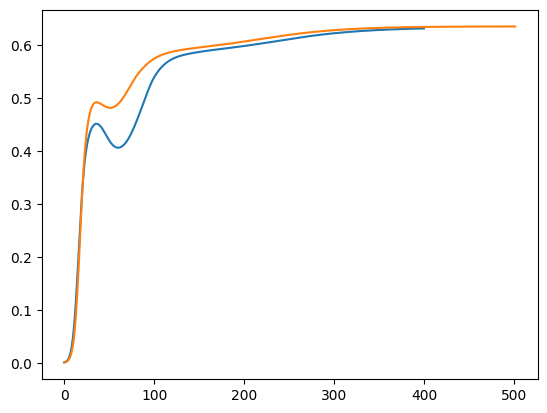

In [29]:
mass1 = np.load(path_sol1 + '/mass.npy')
time1 = np.arange(0,400,0.5)
mass2 = np.load(path_sol2 + '/mass.npy')
time2 = np.arange(0,501,0.1)
plt.plot(time1,mass1)
plt.plot(time2,mass2)
# print(mass1[50:200])
x = np.arange(250,1000,5)
print(np.mean(mass2[x] - mass1[50:200]),np.std(mass2[x] - mass1[50:200]))
